In [1]:
from keras.datasets import mnist

2024-06-21 16:04:39.122188: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-21 16:04:39.122427: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-21 16:04:40.200696: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-21 16:04:41.657316: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-21 16:04:49.855242: W tensorflow/compiler/tf2

In [44]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns 

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
X_train_df = pd.DataFrame(X_train.reshape(60000, 784))
X_test_df = pd.DataFrame(X_test.reshape(10000, 784))

In [128]:
# implement PCA using sklearn
from sklearn.decomposition import PCA
pca = PCA(n_components=4)

In [129]:
X_train_vis = pca.fit_transform(X_train_df)
X_test_vis = pca.transform(X_test_df)

In [130]:
X_train_vis = pd.DataFrame(X_train_vis)
X_train_vis['target'] = y_train

In [131]:
X_train_vis

,0,1,2,3,target
0,123.931186,-312.671842,-24.481681,-555.832833,5
1,1011.718926,-294.852377,596.317695,-460.774806,0
2,-51.849089,392.174982,-188.523466,521.036670,4
3,-799.126177,-607.197320,273.627978,105.933500,1
4,-382.755552,730.546070,16.366868,-241.753434,9
...,...,...,...,...,...
59995,-99.621408,-293.476546,135.932039,-347.093213,8
59996,152.757612,-687.900840,-88.923822,-650.021830,3
59997,-178.054817,160.074242,-257.569743,-714.689950,5
59998,130.604550,-5.590612,513.895164,342.600465,6


In [132]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')

model.fit(X_train_vis.drop(columns=['target']), X_train_vis['target'])

/home/prafull/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

In [133]:
y_hat = model.predict_proba(X_test_vis)

In [134]:
y_pred = np.argmax(y_hat, axis=1)

print("accuracy", accuracy_score(y_test, y_pred))

accuracy 0.5734


In [135]:
conf_mat = pd.DataFrame(confusion_matrix(y_test, y_pred), columns=list(range(0, 10)))

<Axes: >

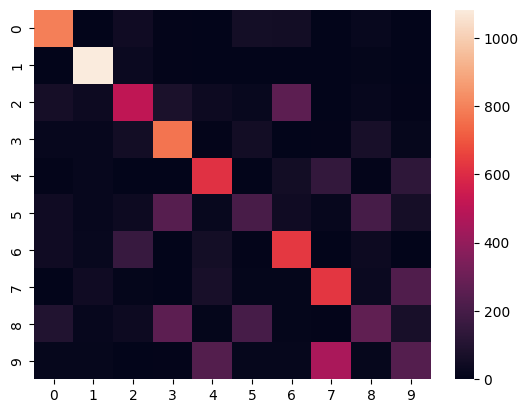

In [136]:
sns.heatmap(conf_mat)